<a href="https://colab.research.google.com/github/cesarmenezes/aplicacao_bd_ds/blob/main/Trabalho_final_Aplica%C3%A7%C3%B5es_de_BD_e_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar as bibliotecas necessárias
!pip install pandas matplotlib seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Carregar o arquivo Excel
df = pd.read_excel('/content/perfis_usuarios_uber_10000_linhas.xlsx')
df.head()


,ID_Usuario,Idade,Gênero,Numero_de_Viagens,Gasto_Medio_por_Viagem,Nivel_de_Membresia,Metodo_de_Pagamento_Preferido,Dispositivo_Usado,Ano_de_Registro,Media_Aceitacao_Primeira_Oferta,Media_Aceitacao_Segunda_Oferta,Taxa_Media_Desistencia
0,1,56,Masculino,260,23.96,Ouro,Cartão de Crédito,Android,2019,165,25,13
1,2,46,Feminino,121,21.49,Prata,PayPal,Android,2017,60,28,20
2,3,32,Masculino,412,17.19,Bronze,PayPal,Android,2019,44,30,19
3,4,25,Masculino,145,23.34,Ouro,Cartão de Débito,iPhone,2018,323,24,6
4,5,38,Feminino,446,30.29,Prata,PayPal,Android,2016,382,17,19


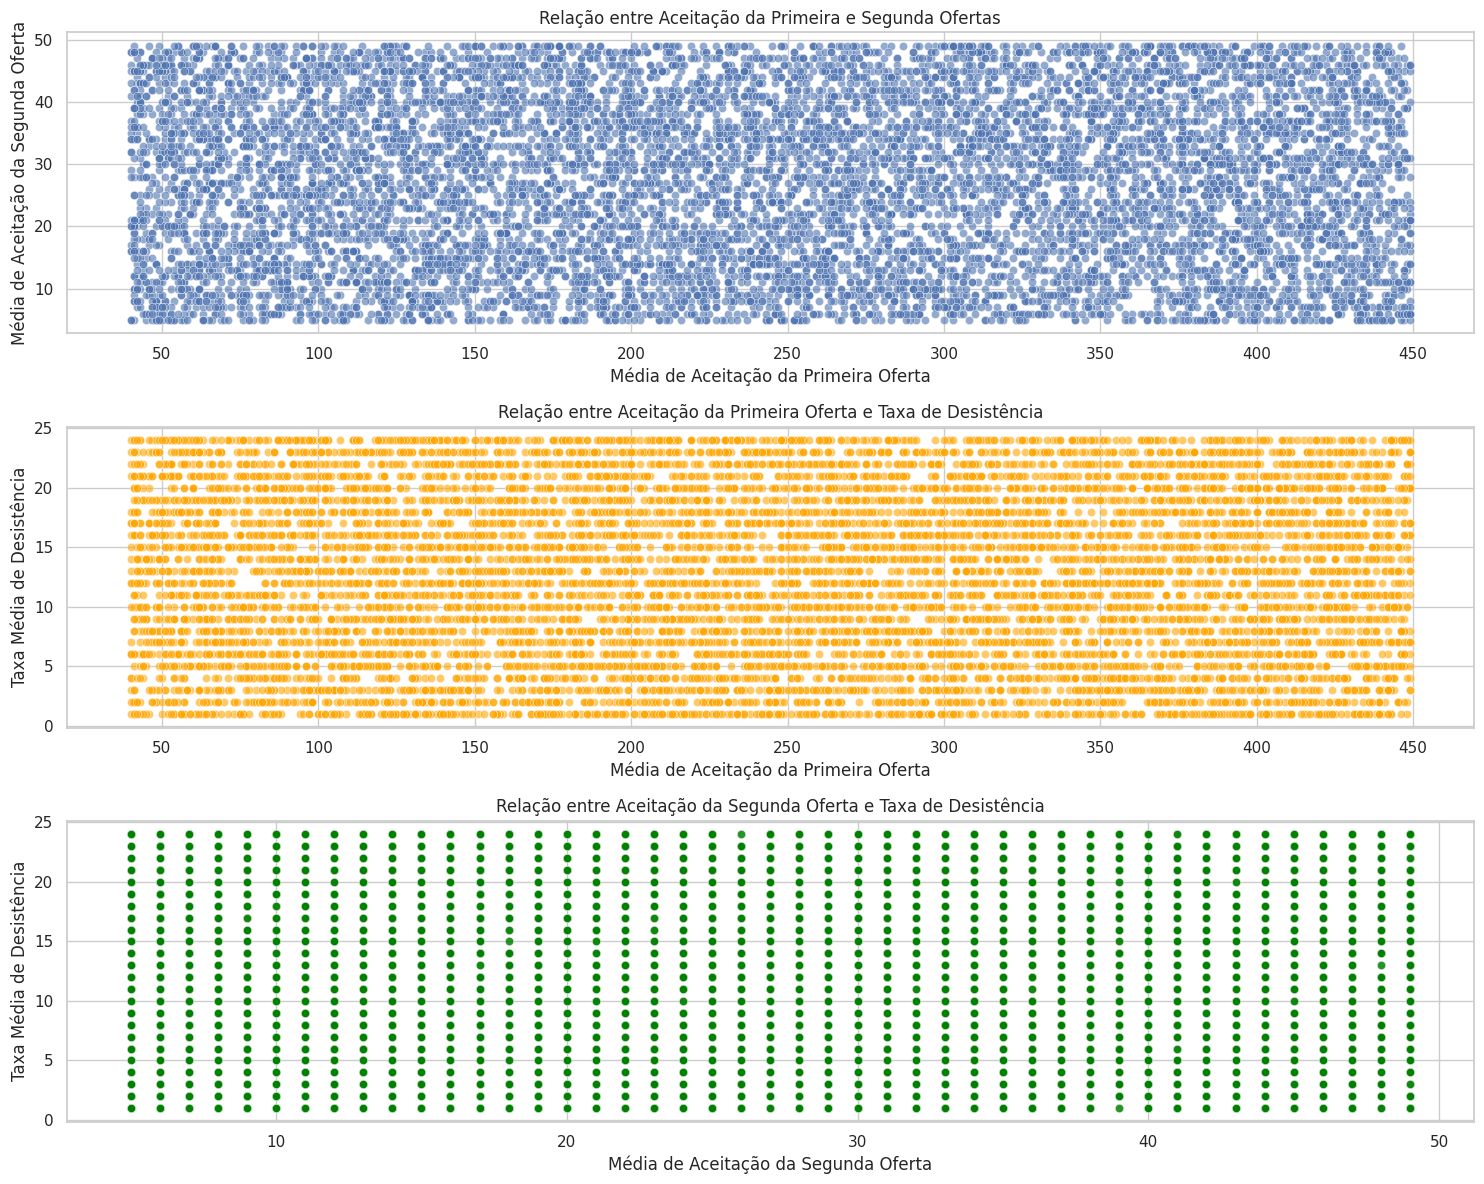

In [ ]:
# Criar os gráficos usando Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

# Gráfico de dispersão entre Media_Aceitacao_Primeira_Oferta e Media_Aceitacao_Segunda_Oferta
plt.subplot(3, 1, 1)
sns.scatterplot(data=df, x='Media_Aceitacao_Primeira_Oferta', y='Media_Aceitacao_Segunda_Oferta', alpha=0.6)
plt.xlabel('Média de Aceitação da Primeira Oferta')
plt.ylabel('Média de Aceitação da Segunda Oferta')
plt.title('Relação entre Aceitação da Primeira e Segunda Ofertas')

# Gráfico de dispersão entre Taxa_Media_Desistencia e Media_Aceitacao_Primeira_Oferta
plt.subplot(3, 1, 2)
sns.scatterplot(data=df, x='Media_Aceitacao_Primeira_Oferta', y='Taxa_Media_Desistencia', color='orange', alpha=0.6)
plt.xlabel('Média de Aceitação da Primeira Oferta')
plt.ylabel('Taxa Média de Desistência')
plt.title('Relação entre Aceitação da Primeira Oferta e Taxa de Desistência')

# Gráfico de dispersão entre Taxa_Media_Desistencia e Media_Aceitacao_Segunda_Oferta
plt.subplot(3, 1, 3)
sns.scatterplot(data=df, x='Media_Aceitacao_Segunda_Oferta', y='Taxa_Media_Desistencia', color='green', alpha=0.6)
plt.xlabel('Média de Aceitação da Segunda Oferta')
plt.ylabel('Taxa Média de Desistência')
plt.title('Relação entre Aceitação da Segunda Oferta e Taxa de Desistência')

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()

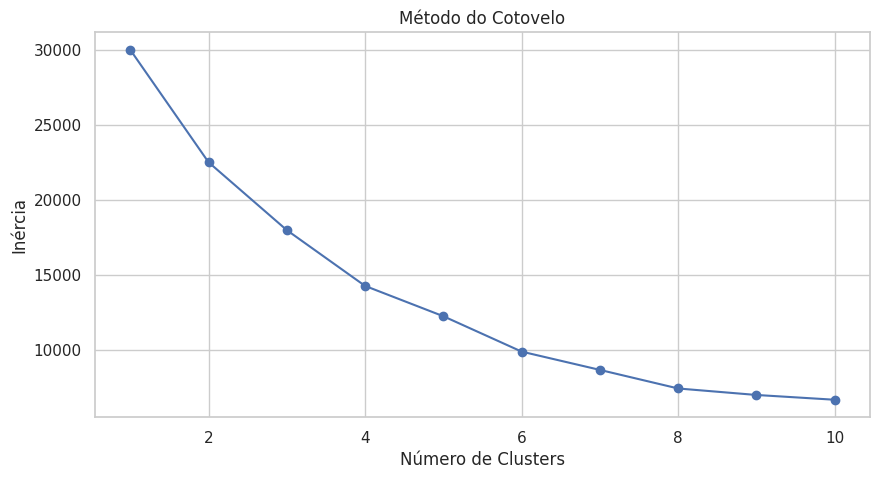

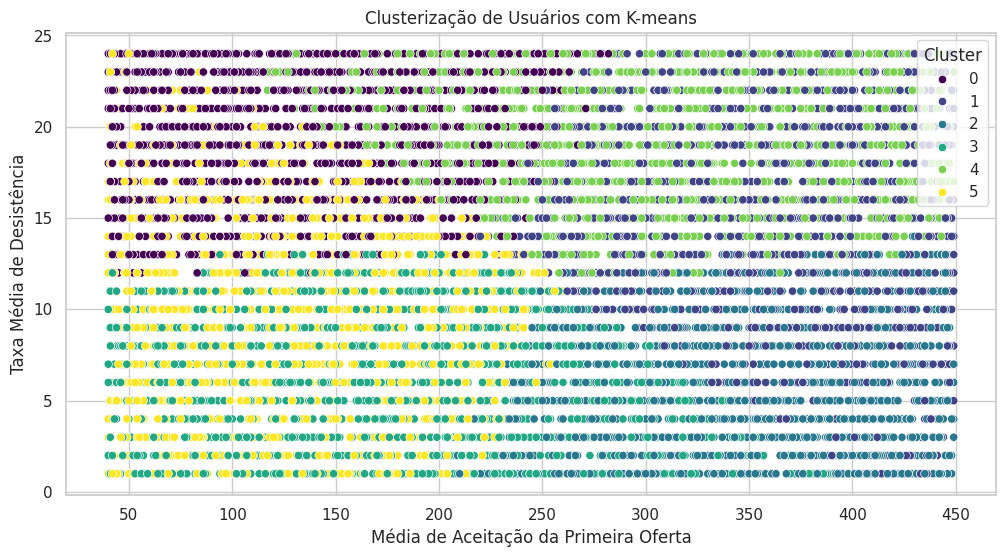

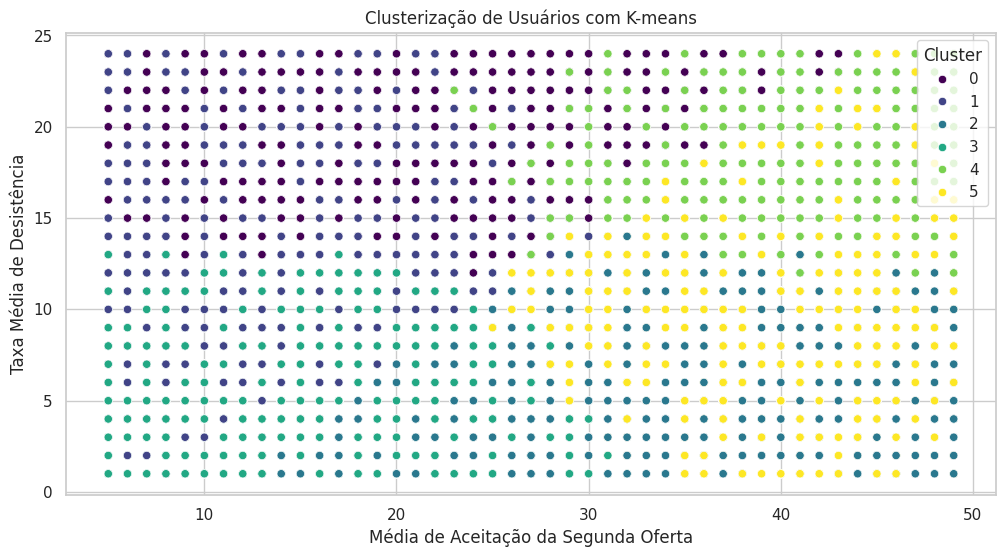

In [ ]:
# CLUSTERIZAÇÃO
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Selecionar as colunas para a clusterização
data = df[['Media_Aceitacao_Primeira_Oferta', 'Media_Aceitacao_Segunda_Oferta', 'Taxa_Media_Desistencia']]

# Normalizar os dados
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Encontrar o número ideal de clusters usando o método do cotovelo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

#Escolher um número de clusters (por exemplo, 3, com base no gráfico do cotovelo) e ajustar o modelo
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_normalized)

#Visualizar os clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Media_Aceitacao_Primeira_Oferta', y='Taxa_Media_Desistencia', hue='Cluster', palette='viridis')
plt.title('Clusterização de Usuários com K-means')
plt.xlabel('Média de Aceitação da Primeira Oferta')
plt.ylabel('Taxa Média de Desistência')
plt.legend(title='Cluster')
plt.show()

#Visualizar os clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Media_Aceitacao_Segunda_Oferta', y='Taxa_Media_Desistencia', hue='Cluster', palette='viridis')
plt.title('Clusterização de Usuários com K-means')
plt.xlabel('Média de Aceitação da Segunda Oferta')
plt.ylabel('Taxa Média de Desistência')
plt.legend(title='Cluster')
plt.show()

Média de características dos usuários com alta desistência:
        ID_Usuario        Idade  Numero_de_Viagens  Gasto_Medio_por_Viagem  \
count  2080.000000  2080.000000        2080.000000             2080.000000   
mean   4972.307212    38.486058         276.913942               25.040322   
std    2889.338909    11.914228         128.715573                5.774865   
min       2.000000    18.000000          50.000000               15.000000   
25%    2474.750000    28.000000         166.750000               20.172500   
50%    5019.000000    39.000000         275.500000               25.085000   
75%    7464.000000    48.000000         392.000000               30.067500   
max    9998.000000    59.000000         499.000000               34.990000   

       Ano_de_Registro  Media_Aceitacao_Primeira_Oferta  \
count      2080.000000                      2080.000000   
mean       2018.468269                       243.933654   
std           2.277513                       119.107065   
m

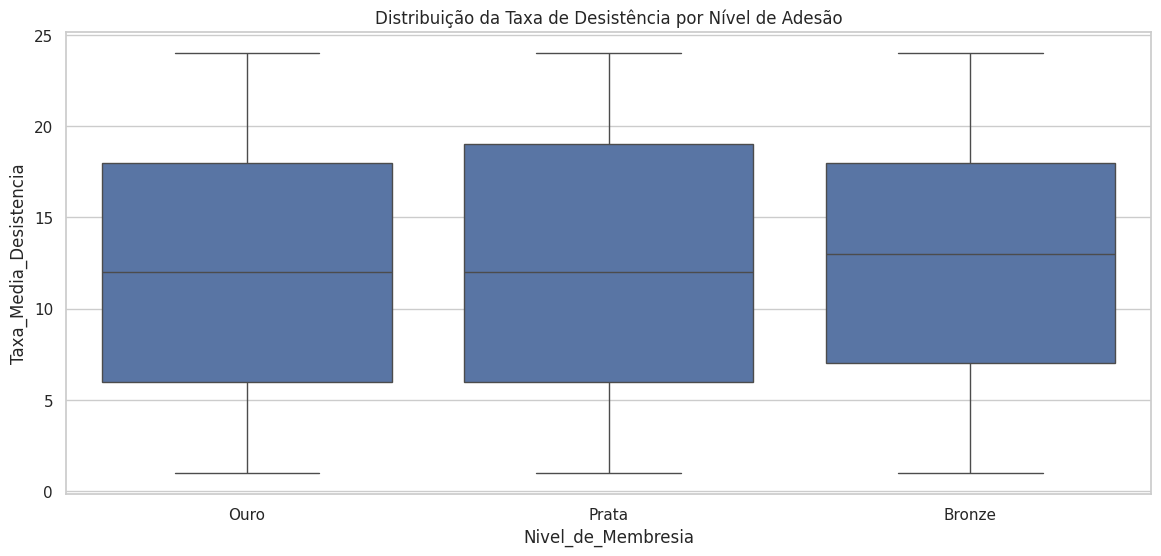

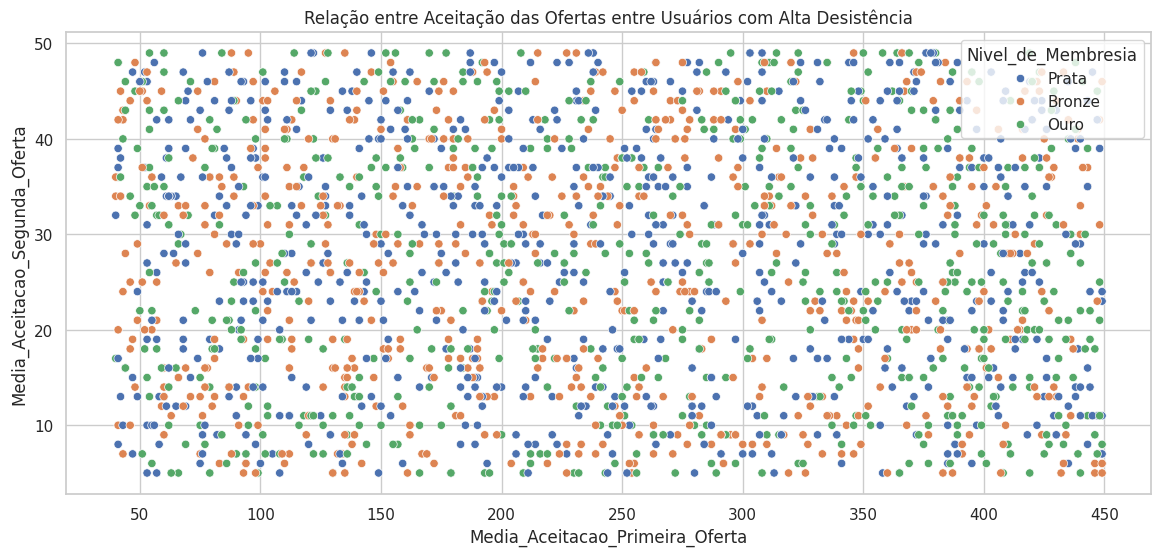

In [ ]:
# Filtrar indivíduos com alta taxa de desistência (acima do 75º percentil)
high_churn_threshold = df['Taxa_Media_Desistencia'].quantile(0.75)
high_churn_users = df[df['Taxa_Media_Desistencia'] > high_churn_threshold]

# Analisar estatísticas desses usuários em comparação com o resto
print("Média de características dos usuários com alta desistência:")
print(high_churn_users.describe())

# Visualização das diferenças entre altas e baixas desistências em relação à aceitação de ofertas
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Nivel_de_Membresia', y='Taxa_Media_Desistencia')
plt.title('Distribuição da Taxa de Desistência por Nível de Adesão')
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(data=high_churn_users, x='Media_Aceitacao_Primeira_Oferta', y='Media_Aceitacao_Segunda_Oferta', hue='Nivel_de_Membresia')
plt.title('Relação entre Aceitação das Ofertas entre Usuários com Alta Desistência')
plt.show()


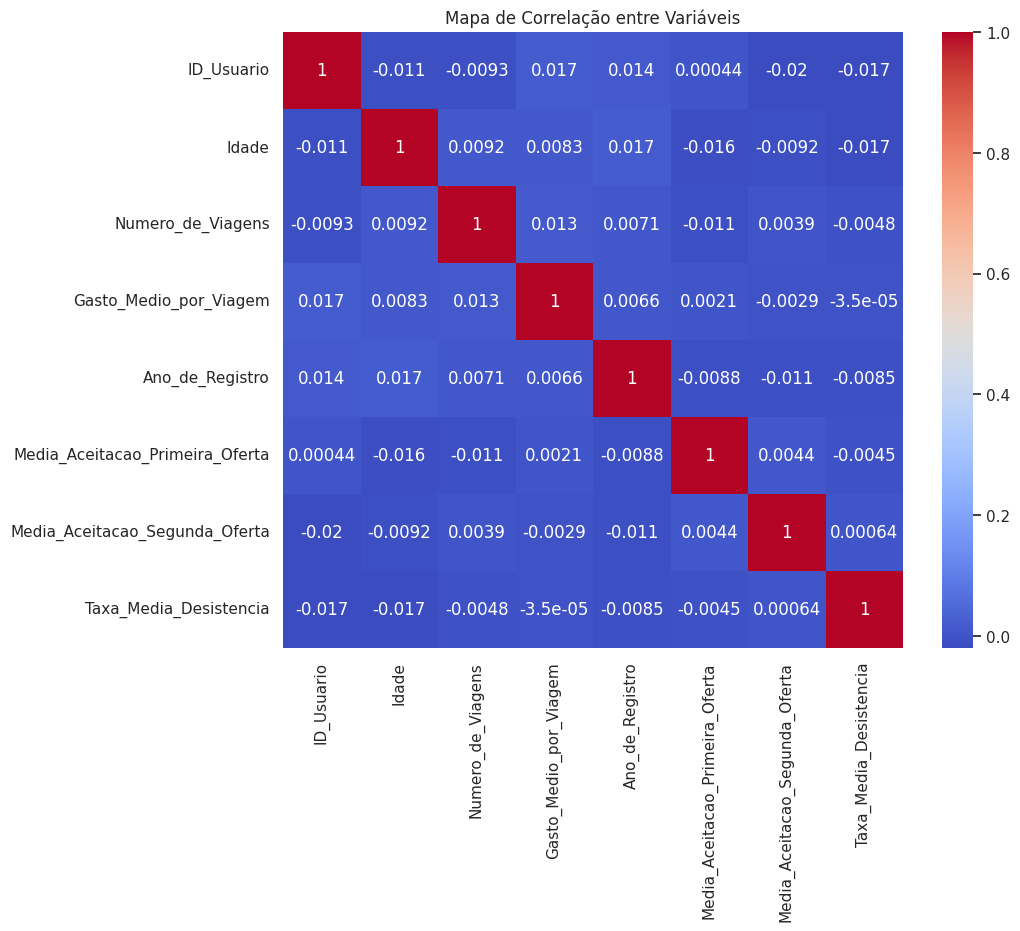

In [ ]:
# Filtrar apenas as colunas numéricas para a análise de correlação
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# 1. Análise de Correlação para Identificar Padrões
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm")
plt.title('Mapa de Correlação entre Variáveis')
plt.show()

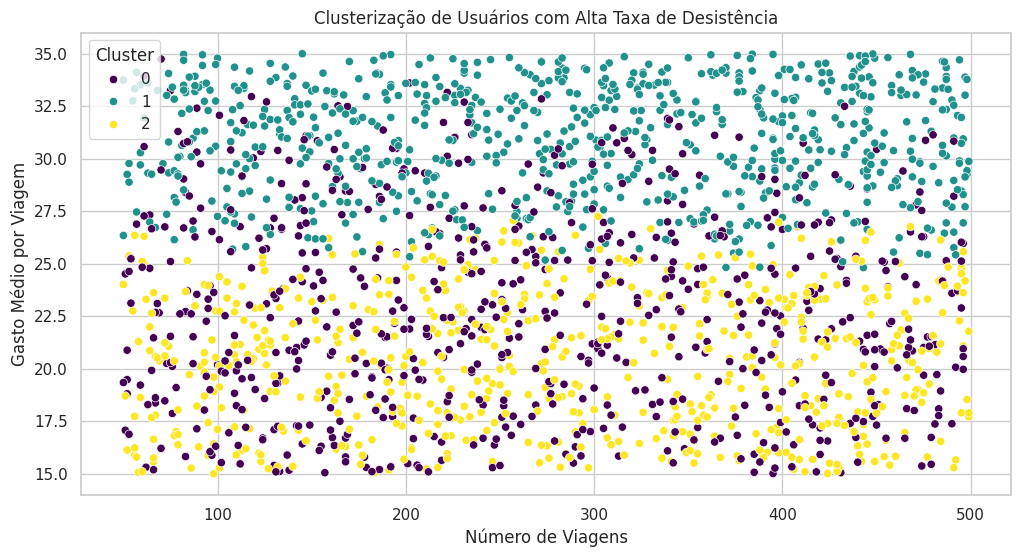

In [ ]:
#Clusterização Focada nos Usuários com Alta Taxa de Desistência

# Filtrar para usuários com alta taxa de desistência (acima do 75º percentil)
high_churn_threshold = df['Taxa_Media_Desistencia'].quantile(0.75)
high_churn_users = df[df['Taxa_Media_Desistencia'] > high_churn_threshold]

# Selecionar colunas relevantes para a clusterização
data_for_clustering = high_churn_users[['Idade', 'Numero_de_Viagens', 'Gasto_Medio_por_Viagem']]

# Normalizar os dados
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_for_clustering)

# Aplicar o K-means para identificar clusters (n_clusters pode ser ajustado com o método do cotovelo)
kmeans = KMeans(n_clusters=3, random_state=42)



# Substitua a linha que gerou o aviso com o seguinte código:
high_churn_users.loc[:, 'Cluster'] = kmeans.fit_predict(data_normalized)

# Visualização dos Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=high_churn_users, x='Numero_de_Viagens', y='Gasto_Medio_por_Viagem', hue='Cluster', palette='viridis')
plt.title('Clusterização de Usuários com Alta Taxa de Desistência')
plt.xlabel('Número de Viagens')
plt.ylabel('Gasto Médio por Viagem')
plt.legend(title='Cluster')
plt.show()

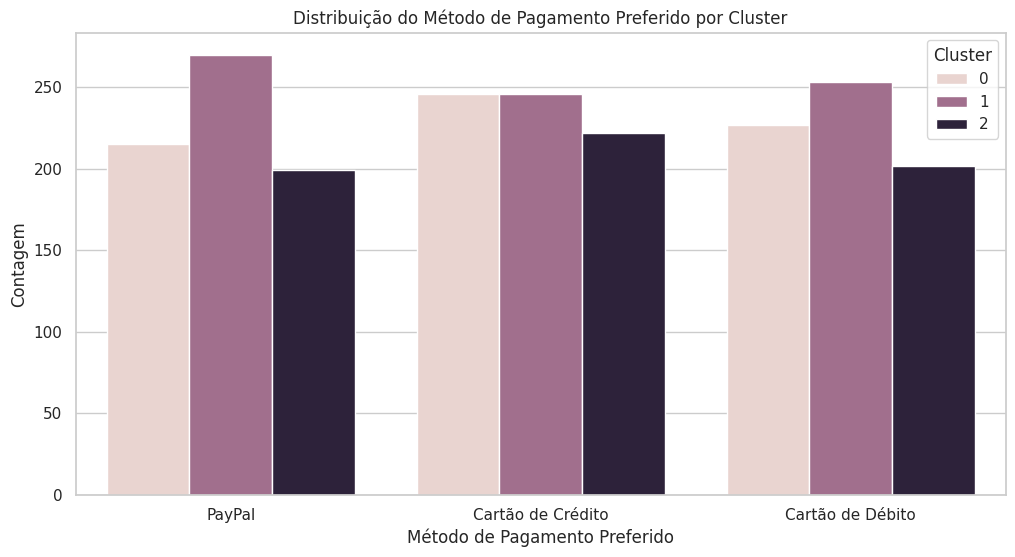

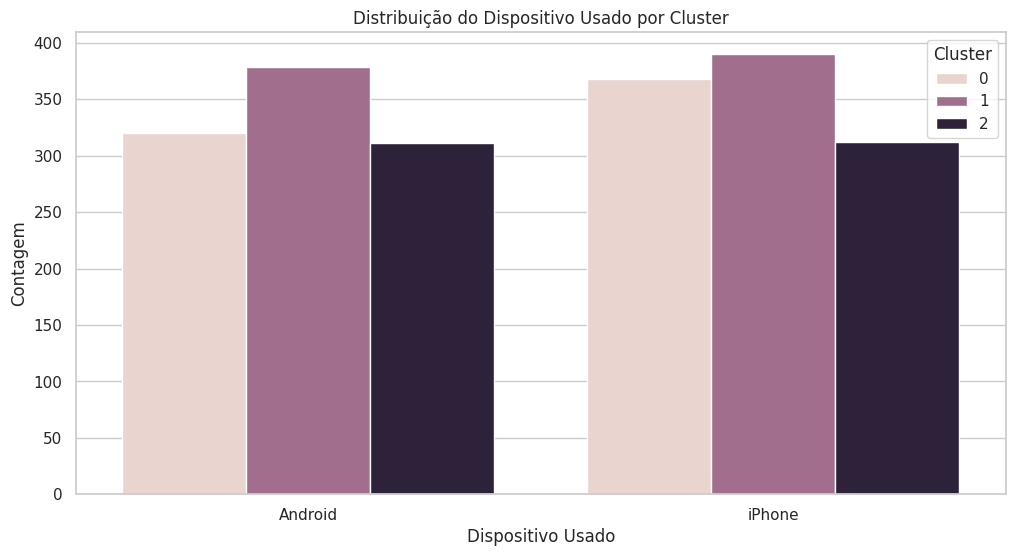

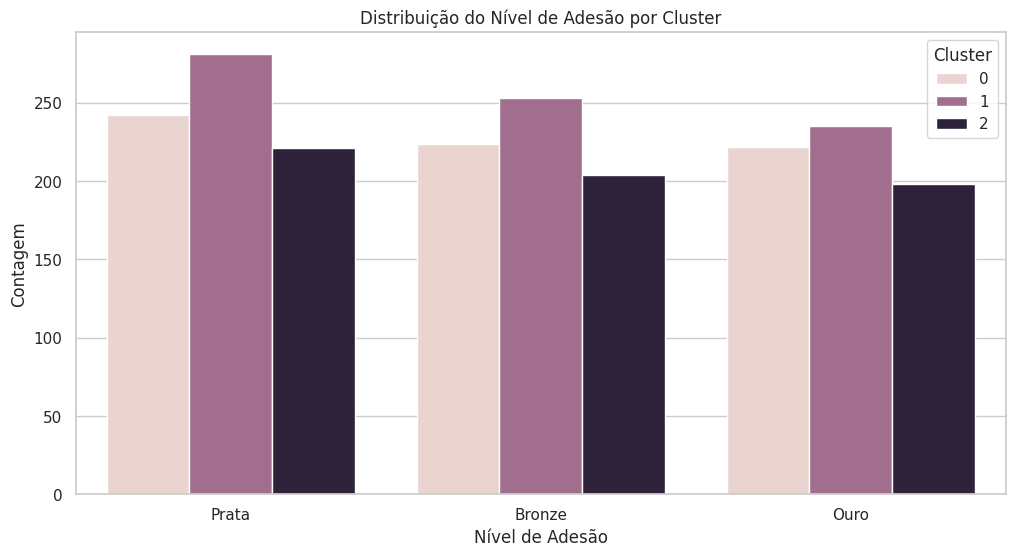

In [ ]:
# 1. Análise da Distribuição de Metodo_de_Pagamento_Preferido por Cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=high_churn_users, x='Metodo_de_Pagamento_Preferido', hue='Cluster')
plt.title('Distribuição do Método de Pagamento Preferido por Cluster')
plt.xlabel('Método de Pagamento Preferido')
plt.ylabel('Contagem')
plt.legend(title='Cluster')
plt.show()

# 2. Análise da Distribuição de Dispositivo_Usado por Cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=high_churn_users, x='Dispositivo_Usado', hue='Cluster')
plt.title('Distribuição do Dispositivo Usado por Cluster')
plt.xlabel('Dispositivo Usado')
plt.ylabel('Contagem')
plt.legend(title='Cluster')
plt.show()

# 3. Análise da Distribuição de Nivel_de_Membresia por Cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=high_churn_users, x='Nivel_de_Membresia', hue='Cluster')
plt.title('Distribuição do Nível de Adesão por Cluster')
plt.xlabel('Nível de Adesão')
plt.ylabel('Contagem')
plt.legend(title='Cluster')
plt.show()

<ipython-input-34-00a1eb7d566b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_churn_users['Cluster'] = kmeans.fit_predict(data_normalized)


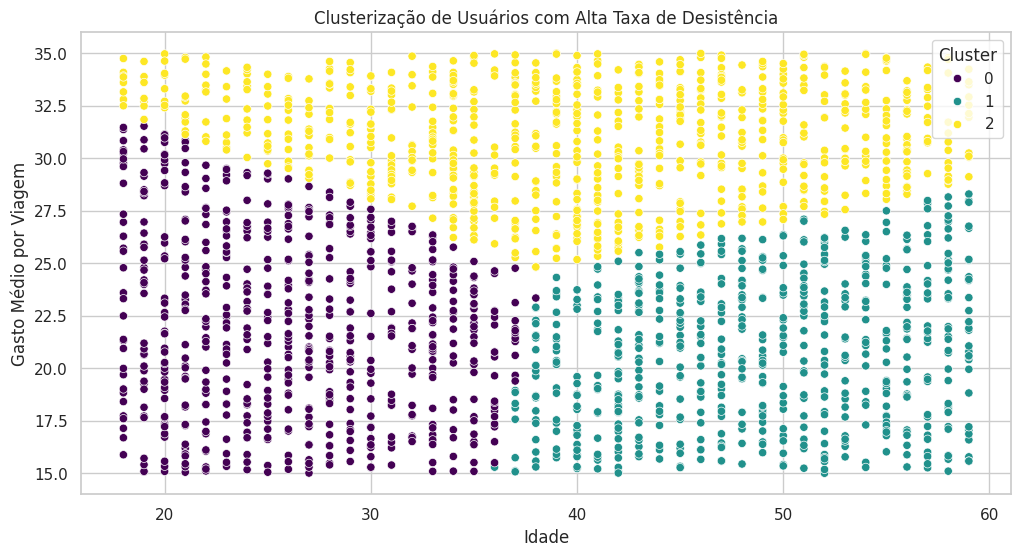

In [ ]:
# Filtrar para usuários com alta taxa de desistência (acima do 75º percentil)
high_churn_threshold = df['Taxa_Media_Desistencia'].quantile(0.75)
high_churn_users = df[df['Taxa_Media_Desistencia'] > high_churn_threshold]

# Selecionar colunas relevantes para a clusterização
data_for_clustering = high_churn_users[['Idade', 'Gasto_Medio_por_Viagem']]

# Normalizar os dados
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_for_clustering)

# Aplicar o K-means para identificar clusters (por exemplo, usando 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
high_churn_users['Cluster'] = kmeans.fit_predict(data_normalized)

# Visualizar os clusters em um gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(data=high_churn_users, x='Idade', y='Gasto_Medio_por_Viagem', hue='Cluster', palette='viridis')
plt.title('Clusterização de Usuários com Alta Taxa de Desistência')
plt.xlabel('Idade')
plt.ylabel('Gasto Médio por Viagem')
plt.legend(title='Cluster')
plt.show()